### TODO:
- Replicate table 3.4 from Chaoyun's paper

In [1]:
from __future__ import division

from utils import *
from create_data import *

import os
import pandas as pd
import numpy as np
from collections import OrderedDict
import time
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
# from datetime import utcfromtimestamp

# import sqlite3

from ggplot import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

### R stuff

In [2]:
# If you want to ignore R warnings.
# import warnings
# warnings.filterwarnings('ignore')

# from rpy2.robjects.packages import isinstalled
# from rpy2.robjects.vectors import StrVector
# import rpy2.robjects.packages as rpackages
# from rpy2.robjects.packages import importr

# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# packnames = ('forecast')
# utils.install_packages(packnames)

# isinstalled('forecast')

# %%R
# y <- 1

# %load_ext rpy2.ipython

### Define project vars

In [3]:
dir_proj = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis'
dir_data = os.path.join(dir_proj, 'data')
dir_run = os.path.join(dir_proj, 'run', str(date.today()))

In [4]:
HOUSE_IDS = range(1, 22); HOUSE_IDS.remove(14)  # no house 14
APP_NAMES = ['fridge', 'kettle', 'washing machine', 'dishwasher', 'microwave']
# tz = 'Europe/London'

In [5]:
# params_appliance = get_params_appliance()
dir_refit_csv = os.path.join(dir_data, 'CLEAN_REFIT_081116')
dir_refit = os.path.join(dir_data, 'refit')

In [7]:
# save_refit_data(dir_refit_csv=dir_refit_csv,
#                 dir_refit_np=dir_refit,
#                 nrows=None)

writing REFIT data...
added house 1 (0.31 min)
added house 2 (0.25 min)
added house 3 (0.32 min)
added house 4 (0.37 min)
added house 5 (0.37 min)
added house 6 (0.31 min)
added house 7 (0.32 min)
added house 8 (0.33 min)
added house 9 (0.24 min)
added house 10 (0.34 min)
added house 11 (0.32 min)
added house 12 (0.29 min)
added house 13 (0.26 min)
added house 15 (0.36 min)
added house 16 (0.27 min)
added house 17 (0.25 min)
added house 18 (0.24 min)
added house 19 (0.22 min)
added house 20 (0.19 min)
added house 21 (0.2 min)
done!


In [6]:
apps = pd.read_csv(os.path.join(dir_data, 'appliances.csv'))
app_dict = create_app_dict()
apps = apps_add_cols_from_patterns(apps, app_dict)

In [7]:
get_house_app_tuples, get_app_nums, get_app_name, is_a_target_app = create_app_funs(apps, app_dict, APP_NAMES)
load_app, load_ts, load_issues = create_load_funs(dir_refit)

# app_col, pattern = app_col_and_pattern_tuples[1]
# for i in apps.loc[apps[app_col] == 1]['ApplianceOrig'].values:
#     print i

# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('fridge')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('kettle')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('washi')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('dish')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('micro')]

# get_house_app_tuples('fridge')
# get_house_app_tuples('kettle')
# get_house_app_tuples('washing machine')

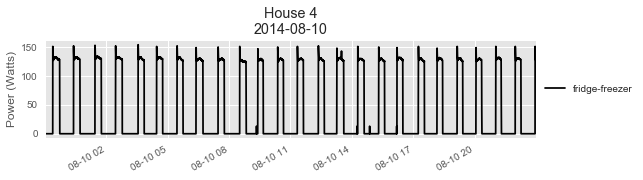

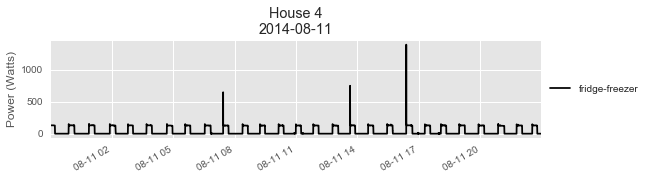

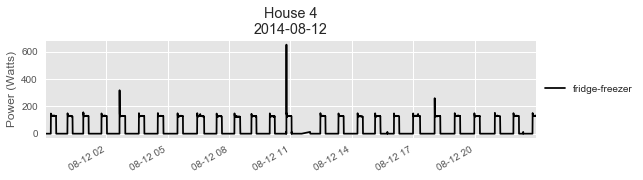

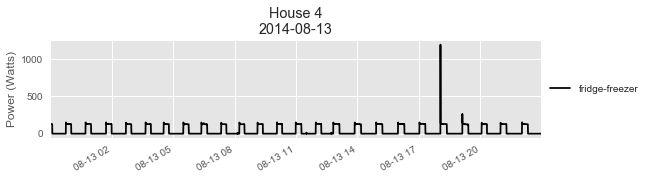

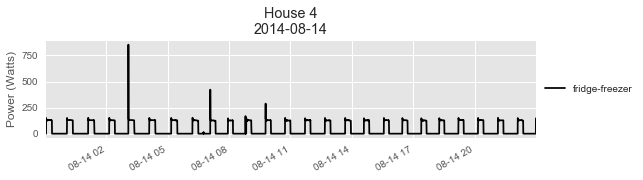

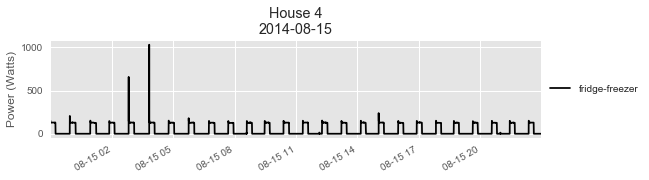

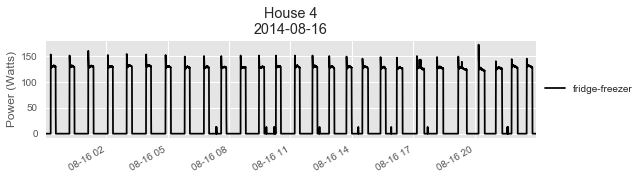

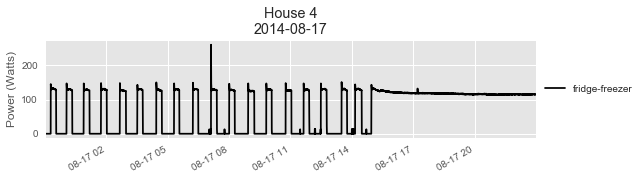

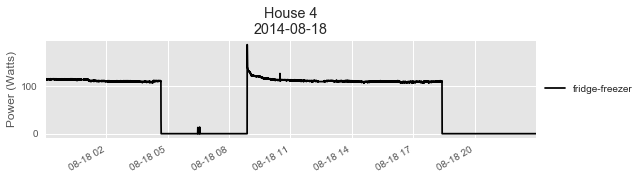

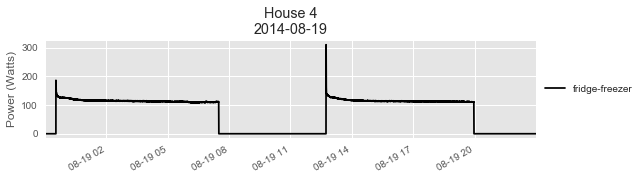

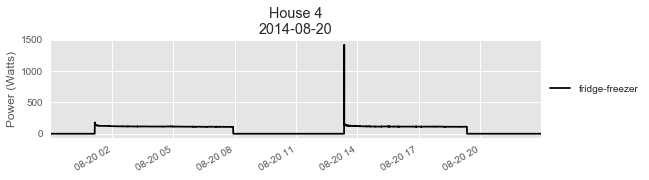

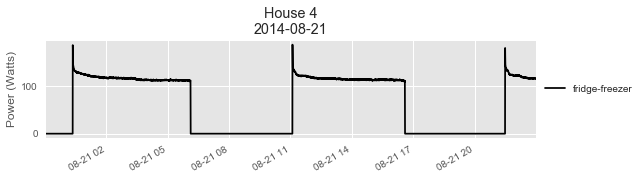

In [27]:
# Note change in fridge-freezer model.
plot_date_range(4, datetime(2014,8,17), app_names='fridge-freezer')
plt.savefig

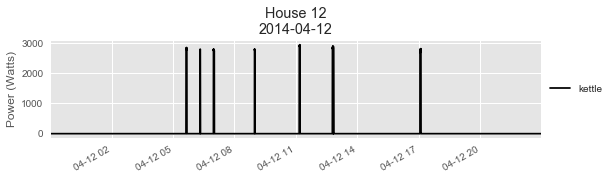

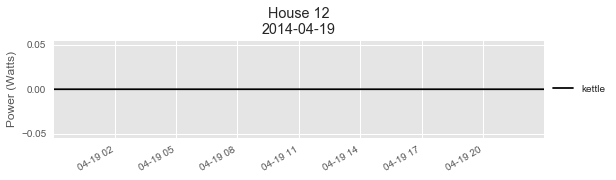

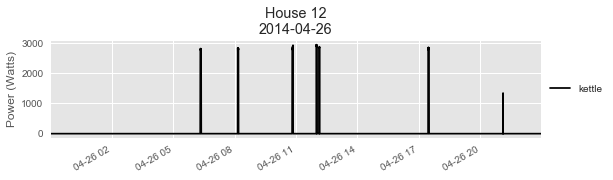

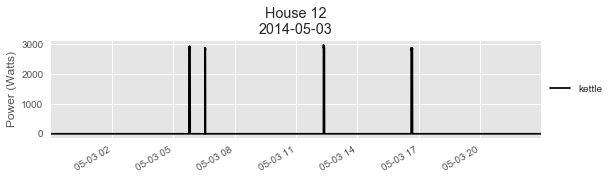

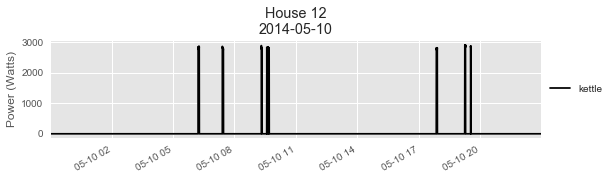

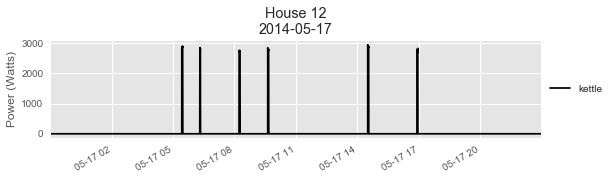

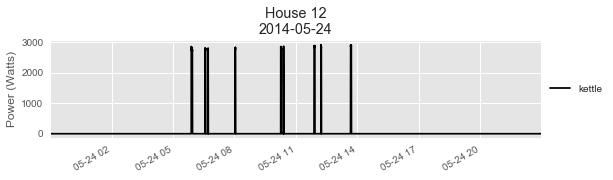

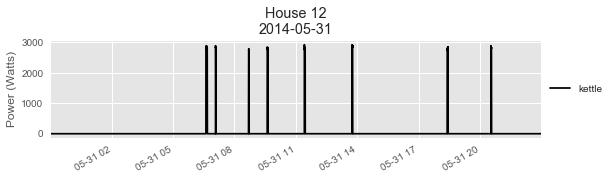

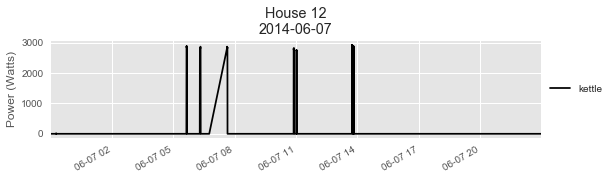

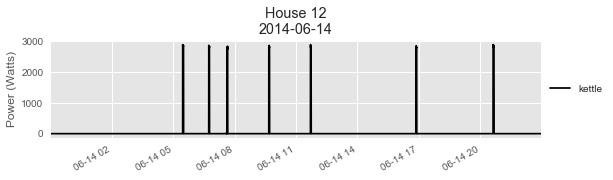

In [26]:
# Note how it appears to be a kettle and not a computer site.
def plot_date_range(house_id, dt_base, day_range=range(-7, 5), app_names=None, figsize=(11,2)):
    '''
    Make multiple daily plots for a house within a date range.
    '''
    if isinstance(app_names, basestring):
        app_names = [app_names]  # if they were entered as string, convert to list for Pandas
    for day_delta in day_range:
        dt = dt_base + timedelta(days=day_delta)
        try:
            plot_day(house_id, dt, figsize=figsize, cols=app_names)
        except TypeError:
            print 'no data for {}'.format(str(dt.date()))
            
plot_date_range(12, datetime(2014,5,17), day_range=np.array(range(-5,5))*7, app_names=['kettle'])

In [ ]:
# create_daily_plots(house_ids, dir_run)

In [38]:
# dstats = create_daily_stats(HOUSE_IDS,
#                             pkl_path=os.path.join(dir_data, 'stats_by_day.pkl'),
#                             nrow=None)

In [8]:
dstats = pd.read_pickle(os.path.join(dir_data, 'stats_by_day.pkl'))

In [279]:
# plot_day(2, datetime.datetime(2014,9,7), figsize=(11,8))

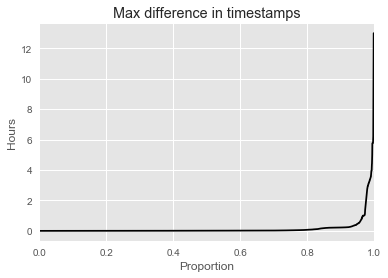

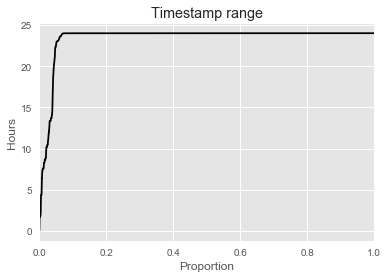

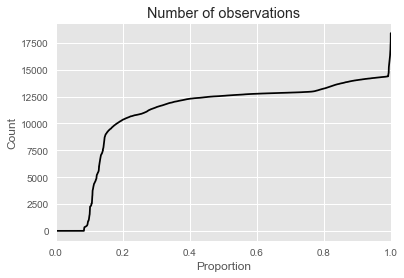

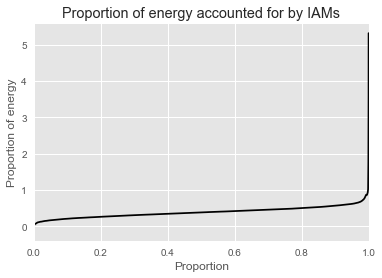

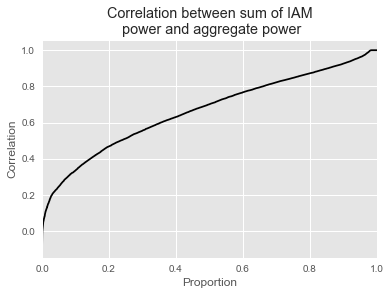

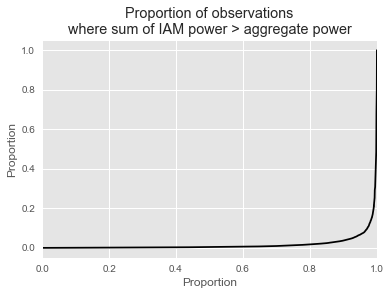

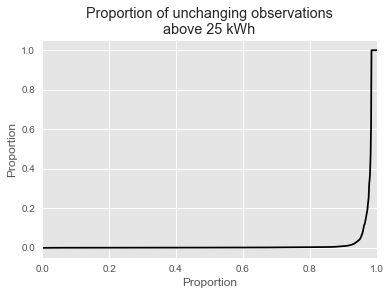

In [637]:
vars_to_plot = [{'col': ('UnixDiff', 'max'), 'ylab': 'Hours', 'title': 'Max difference in timestamps'},
                {'col': 'HourRange', 'ylab': 'Hours', 'title': 'Timestamp range'},
                {'col': ('RowNum', 'len'), 'ylab': 'Count', 'title': 'Number of observations'},
                {'col': ('PctAccountedEnergy', 'total'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for by IAMs'},
                # {'col': ('PctAccountedEnergy', 'std'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for\nby IAMs (standard dev.)'},
                {'col': 'SumToMainCorr', 'ylab': 'Correlation', 'title': 'Correlation between sum of IAM\n power and aggregate power'},
                {'col': ('Issues', 'mean'), 'ylab': 'Proportion', 'title': 'Proportion of observations\nwhere sum of IAM power > aggregate power'},
                {'col': ('Appliance0', 'prop_unchanging_large_value'), 'ylab': 'Proportion', 'title': 'Proportion of unchanging observations\nabove 25 kWh'}]
for var_to_plot in vars_to_plot:
    plot_data = pd.DataFrame({'X': sorted(dstats[var_to_plot['col']].dropna())})
    plot_data['Proportion'] = [i/plot_data.shape[0] for i in range(plot_data.shape[0])]
    ax = plot_data.set_index('Proportion').plot(color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_ylabel(var_to_plot['ylab'])
    ax.legend().set_visible(False)

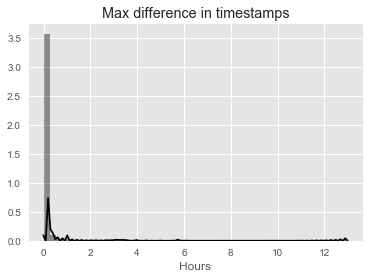

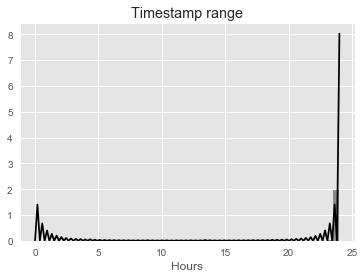

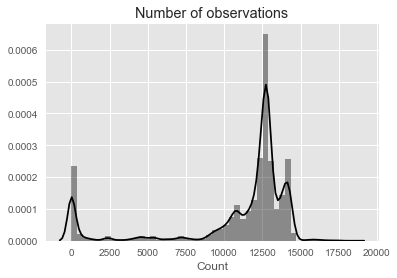

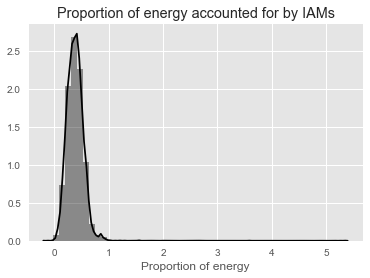

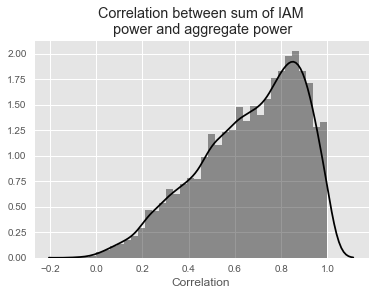

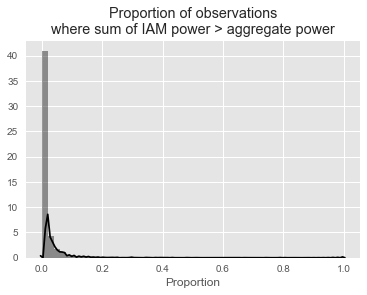

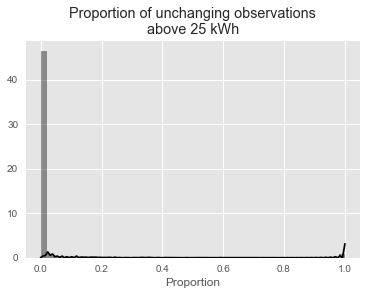

In [638]:
for var_to_plot in vars_to_plot:
    var_name = var_to_plot['col']
    kde_data = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).dropna().values
    ax = sns.distplot(kde_data, rug=False, color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_xlabel(var_to_plot['ylab'])
    plt.show()

In [10]:
# Get NaN proportions.
for var_to_plot in vars_to_plot:
    x = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).values
    print '{0}: {1:0.2g}'.format(var_to_plot['col'], np.mean(np.isnan(x)))

('UnixDiff', 'max'): 0.083
HourRange: 0.083
('RowNum', 'len'): 0
('PctAccountedEnergy', 'total'): 0.084
('PctAccountedEnergy', 'std'): 0.12
SumToMainCorr: 0.084
('Issues', 'mean'): 0.083


Issues


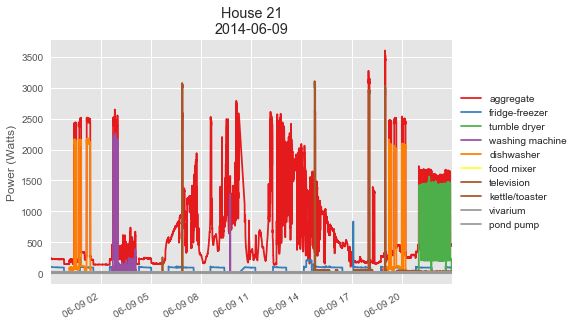

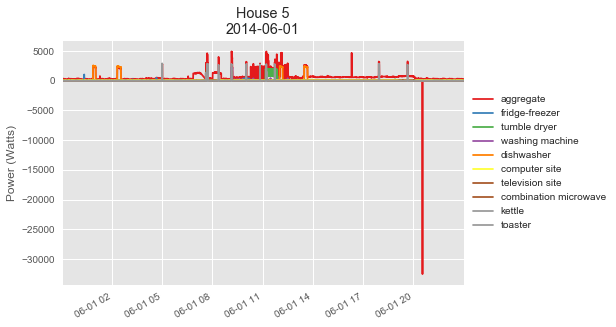

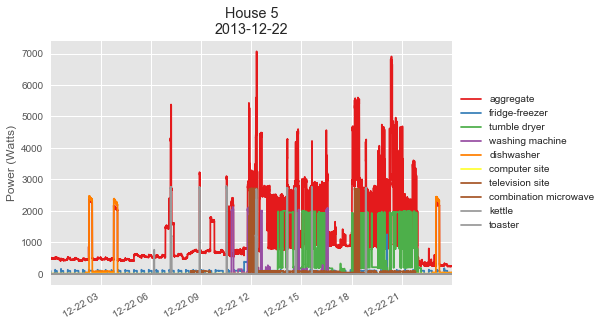

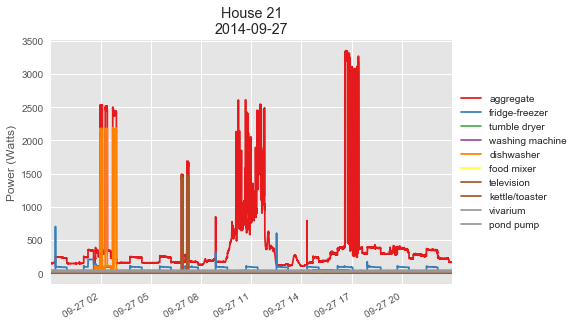

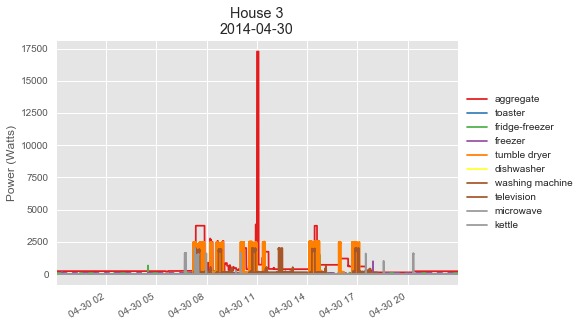

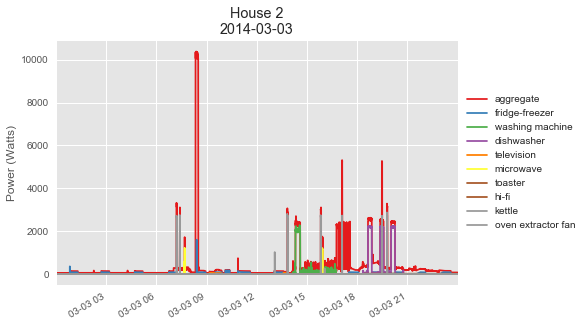

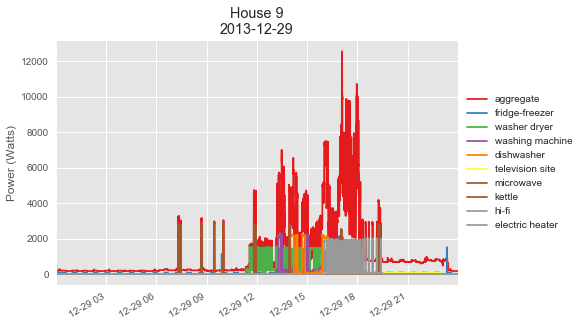

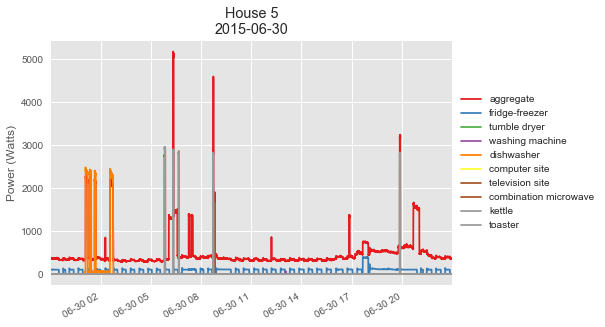

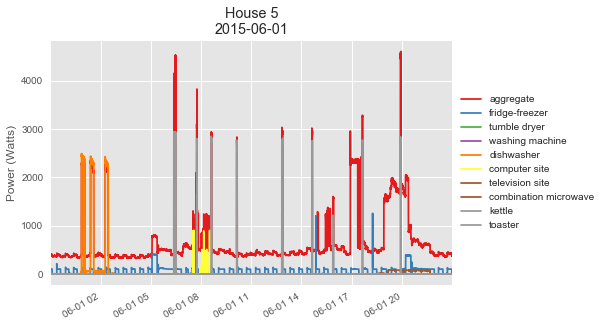

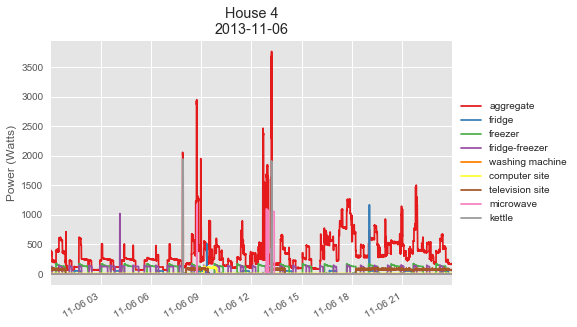

In [639]:
# %run create_data

def plot_samples(condition, n=10):
    sample = dstats.loc[condition].sample(n)
    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    for dt, house_id in zip(dt_series, house_ids):
        plot_day(dt=dt, house_id=house_id)
        plt.show()

np.random.seed(1)
# print 'UnixDiff'
# plot_samples(dstats[('UnixDiff', 'max')] > 0.25, 10)
# print 'HourRange'
# plot_samples(dstats['HourRange'] < 23.5, 10)
# print 'RowNum'
# plot_samples((np.isfinite(dstats[('RowNum', 'len')].values)) & (dstats[('RowNum', 'len')] < 2000), 10)
# print 'PctAccountedEnergy - identity'
# plot_samples(dstats[('PctAccountedEnergy', 'identity')] > float('inf'), 10)
# print 'PctAccountedEnergy - std'
# plot_samples(dstats[('PctAccountedEnergy', 'std')] > float('inf'), 10)
# print 'SumToMainCorr'
# plot_samples(dstats['SumToMainCorr'] < 0.20, 10)
print 'Issues'
plot_samples(dstats[('Issues', 'mean')] > 0.01, 10)
# print 'prop_unchanging_large_value'
# plot_samples((np.isfinite(dstats[('Appliance1', 'prop_unchanging_large_value')].values)) & \
#                  (dstats[('Appliance1', 'prop_unchanging_large_value')] > 0.05),
#              10)


In [424]:
# house_id = 16
# dt = datetime(2014,10,11)
# df = get_df(house_id=house_id, dt_start=dt)

In [462]:
# dstats.to_csv(os.path.join(dir_data, 'dstats_TEMP.csv'))

In [9]:
dstats = clean_daily_stats(dstats)

cleaning daily stats...
1013 (9.3%) rows affected in total, 1013 (9.3%) new | Condition 1 (('RowNum', 'len'))
750 (6.9%) rows affected in total, 650 (6%) new | Condition 2 (('UnixDiff', 'max'))
605 (5.6%) rows affected in total, 422 (3.9%) new | Condition 3 (HourRange)
284 (2.6%) rows affected in total, 246 (2.3%) new | Condition 4 (('Issues', 'mean'))
64 (0.59%) rows affected in total, 20 (0.18%) new | Condition 5 (HoursInDay)
9 (0.083%) rows affected in total, 7 (0.064%) new | Condition 6 (('Appliance0', 'min'))
0 (0%) rows affected in total, 0 (0%) new | Condition 7 (('Appliance1', 'min'))
159 (1.5%) rows affected in total, 122 (1.1%) new | Condition 8 (('Appliance1', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 9 (('Appliance2', 'min'))
105 (0.96%) rows affected in total, 35 (0.32%) new | Condition 10 (('Appliance2', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 11 (('Appliance3', 'min'))
114 (1%) rows

In [12]:
# get_energy(dstats, 1, datetime(2014,4,5), [1])

In [19]:
# %run create_data

get_app_nums(4, 'fridge')
# get_energy(dstats, 4, datetime.datetime(2013,10,12), [1, 3])

[1, 3]

In [484]:
# get_house_app_tuples('washing machine', True)

In [502]:
# agg.loc[agg['House']==house_id].loc[str(dt.date())]['Delete'].values[0]

In [36]:
# X, Y, x_house, x_date = create_data(HOUSE_IDS, app_names, dstats, dir_data)

/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


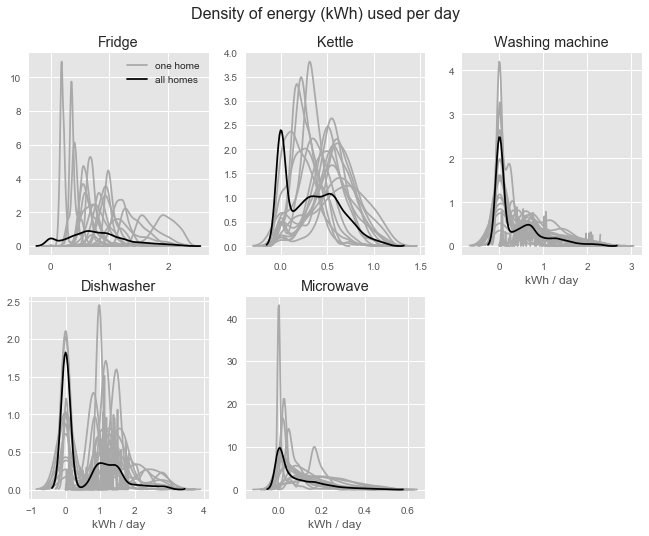

In [76]:
target_type = ['energy', 'activations'][0]
figsize=(11,8)

X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

Y = Y1 if target_type=='energy' else Y2
kde = target_type=='energy'
hist = target_type=='activations'
# kde = True
# hist = False

fig = plt.figure(figsize=figsize)
target_text = 'Density of energy (kWh) used per day' if target_type=='energy' else 'Histogram of activations per day'
fig.suptitle('{}'.format(target_text), size=16)
fig.subplots_adjust(top=0.9) 
gs = gridspec.GridSpec(2, 3)

house_ids_plot = list(set(x_house))
for i, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[i])
    y = pd.DataFrame({'Energy': [y_row[i] for y_row in Y],
                      'House': x_house})
    y = y[y['Energy'] < np.percentile(y['Energy'], 99)]
    if target_type == 'energy':
        for house_id_plot in house_ids_plot:
            if i == 0:
                label = 'one home' if house_id_plot == house_ids_plot[0] else None
            y_house = y.loc[y['House'] == house_id_plot]
            sns.distplot(y_house['Energy'].values, color='darkgray', label=label, kde=kde, hist=hist)
    ax.set_title('{}'.format(app_name.capitalize()))
    if i > 1:
        xlabel = 'kWh / day' if target_type=='energy' else 'No. of activations'
        ax.set_xlabel(xlabel)
    # ax.set_xlim(0,)
    all_homes_label = 'all homes' if i==0 else None
    sns.distplot(y['Energy'].values, color='black', label=all_homes_label, kde=kde, hist=hist)
# plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'app_densities_{}.pdf'.format(target_type)))
plt.show()

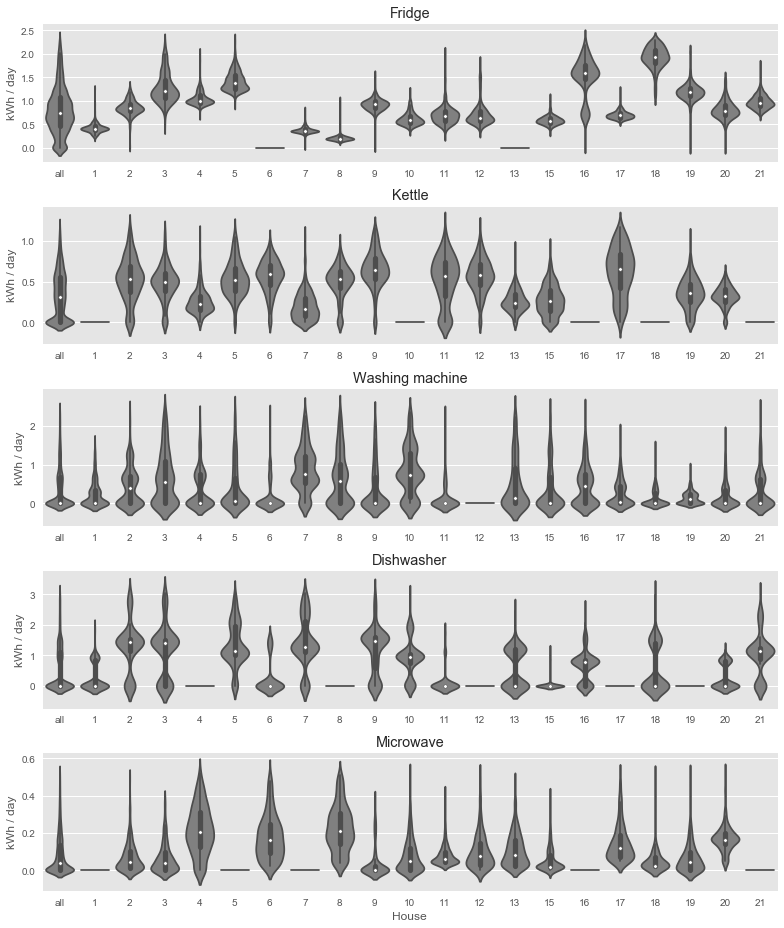

In [375]:
figsize=(11,13)

# X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
# Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
# x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

# Create value for all homes.
Y1 = np.vstack([Y1, Y1])
x_house = np.concatenate([['all']*len(x_house), map(str, x_house)])


fig = plt.figure(figsize=figsize)
# target_text = 'Density of energy (kWh) used per day' if target_type=='energy' else 'Histogram of activations per day'
# fig.suptitle('{}'.format(target_text), size=16)
# fig.subplots_adjust(top=0.9) 
gs = gridspec.GridSpec(5, 1)

house_ids_plot = list(set(x_house))
# for i, app_name in enumerate(APP_NAMES + ['all appliances']):
for i, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[i])
    fn = sum if app_name == 'all appliances' else lambda x: x[i]
    df = pd.DataFrame({'Energy': [fn(y_row) for y_row in Y1],
                       'House': x_house})
    df = df[df['Energy'] < np.percentile(df['Energy'], 99)]
    sns.violinplot(x='House', y='Energy', data=df, scale='width', color='gray')
    ax.set_title('{}'.format(app_name.capitalize()))
    xlabel = 'House' if i==len(APP_NAMES)-1 else ''
    ax.set_xlabel(xlabel)
    ax.set_ylabel('kWh / day')
plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'energy_densities_by_house_app.pdf'))
plt.show()

# df = pd.DataFrame(Y1)
# df.columns = APP_NAMES
# df['all'] = df.sum(axis=1)
# df['House'] = x_house
# df = pd.melt(df, id_vars=['House'], var_name='Appliance', value_name='Energy')
# g = sns.FacetGrid(df, row='Appliance', size=2.5, aspect=4, sharey=False)
# g = g.map(sns.violinplot, 'House', 'Energy', scale='width', color='gray')

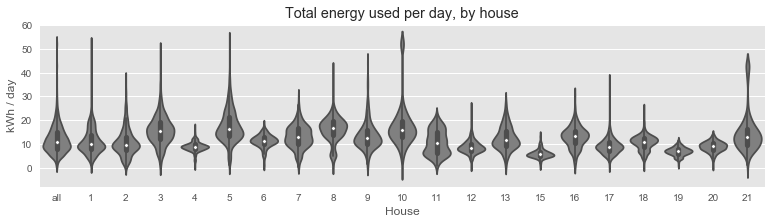

In [75]:
fig = plt.figure(figsize=(13,3))
ax = fig.add_subplot(111)
df1 = pd.DataFrame({'Energy': dstats[('EnergyAppliance0', 'sum')],
                    'House': dstats['House']})
df2 = df1.copy()
df2['House'] = 'all'
df = pd.concat([df2, df1])  # all first
del df1, df2

# y = y[y['Energy'] < np.percentile(y['Energy'], 95)]
# print y
not_too_big   = df['Energy'] < np.percentile(df['Energy'].dropna(), 99.9)
not_too_small = df['Energy'] > np.percentile(df['Energy'].dropna(), 0.1)
df = df[(not_too_big) & (not_too_small)]
sns.violinplot(x='House', y='Energy', data=df, scale='width', color='gray')
ax.set_title('Total energy used per day, by house')
ax.set_xlabel('House')
ax.set_ylabel('kWh / day')
plt.savefig(os.path.join(dir_run, 'energy_densities_by_house.pdf'))
plt.show()

In [40]:
# # One day with negative aggregate.
# plot_day(3, datetime(2014,4,6))

5


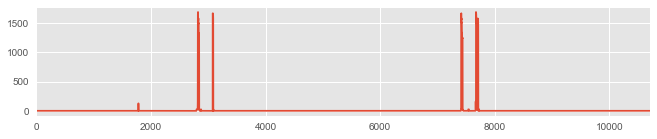

In [576]:
# Test code that gets number of activations.
house_id = 8
app_name = 'microwave'
dt_start = datetime(2014,9,25)

params = make_app_params_dict()[app_name]
app_num = get_app_nums(house_id, app_name)[0]

ts_series = load_ts(house_id)
aligned_arrays, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt_start, 6)

app_power = load_app(house_id, app_num)[ts_mask]
print get_num_activations(app_power,
                          ts_series[ts_mask],
                          params)

plot_series(app_power, figsize=(11,2))

In [153]:
# Plot num activations vs energy.
dir_real_old = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/data/for_model/real'
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-28/real'
dat_old = np.load(os.path.join(dir_real_old, 'Y.npy'))
# dat_old = np.load(os.path.join(dir_real_new, 'Y1.npy'))
dat_new = np.load(os.path.join(dir_real_new, 'Y1.npy'))

dat_new

array([[ 0.41592917,  0.        ,  0.        ,  0.88252639,  0.        ],
       [ 0.31927667,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31819111,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 2.23197417,  0.        ,  0.        ,  1.46398306,  0.        ],
       [ 2.23187083,  0.        ,  0.        ,  1.46391528,  0.        ],
       [ 2.23194833,  0.        ,  0.        ,  1.46396611,  0.        ]])

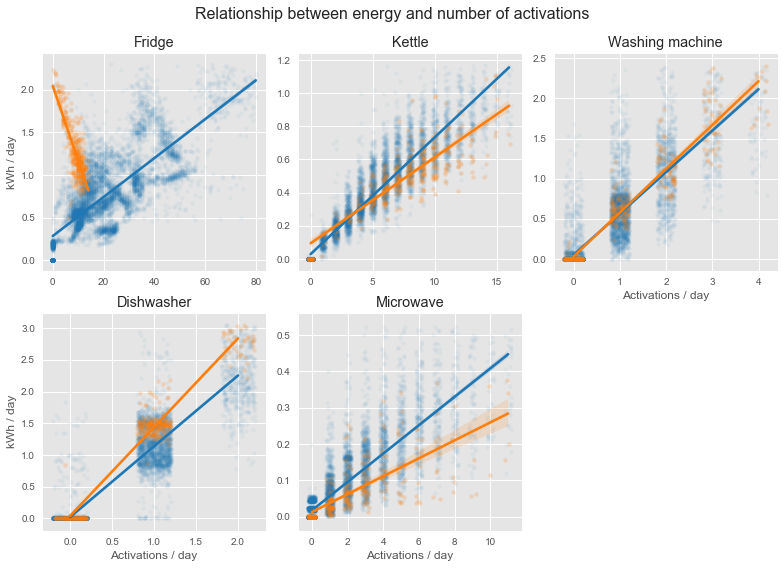

In [77]:
figsize = (11,8)
house_id = 3  # number or None
colormap = plt.cm.tab10
truncate = True
lowess = False
fit_reg = house_id is not None

# X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
# x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

fig = plt.figure(figsize=figsize)
gs = gridspec.GridSpec(2, 3)

for idx, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[idx])
    # ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1, 2)])
    x = Y2[:,idx]
    y = Y1[:,idx]
    extreme = (x > np.percentile(x, 99)) | (y > np.percentile(y, 99))
    x = x[~extreme]
    y = y[~extreme]
    h = x_house[~extreme]
    regplot_args = {}
    if house_id is not None:
        color = h==house_id
        sns.regplot(x[~color], y[~color], color=colormap(0), x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.05, 's': 20})
        sns.regplot(x[color], y[color], color=colormap(1), x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.2, 's': 20})
    else:
        sns.regplot(x, y, color='black', x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.05, 's': 20})
    ax.set_title(app_name.capitalize())
    ylabel = 'kWh / day' if idx in [0,3] else ''
    xlabel = 'Activations / day' if idx>1 else ''
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # plt.hexbin(dat_old[:,idx], dat_new[:,idx], bins='log')
fig.suptitle('Relationship between energy and number of activations', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.9)
# makedirs2(dir_run)
filename = 'corr_scatter.pdf' if house_id is None else 'corr_scatter_house_{}.pdf'.format(house_id)
# plt.savefig(os.path.join(dir_run, filename))
plt.show()

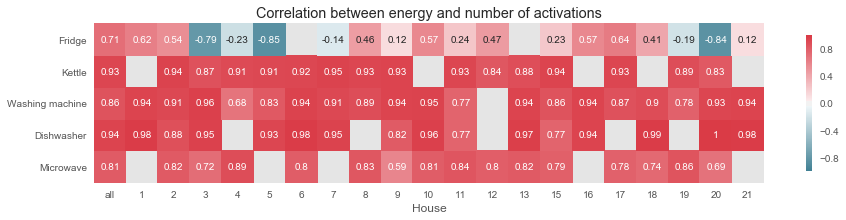

In [71]:
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))

Y1 = np.vstack([Y1, Y1])
Y2 = np.vstack([Y2, Y2])
x_house = np.concatenate([x_house, [-1]*len(x_house)])  # -1 is house_id code for all houses

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

corrs = []

# Now house by house.
for house_id in [-1] + HOUSE_IDS:  # start with all
    corr_house = []
    for idx in range(len(APP_NAMES)):
        try:
            corr_house.append(np.corrcoef(Y1[:,idx][x_house==house_id],
                                          Y2[:,idx][x_house==house_id])[0,1])
        except RuntimeWarning:
            corr_house.append(None)
    corrs.append(corr_house)
    
corrs = pd.DataFrame(corrs)
corrs.columns = map(lambda x: x.capitalize(), APP_NAMES)
corrs.index = ['all'] + HOUSE_IDS  # start with all
corrs = corrs.T

del Y1, Y2, x_house

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrs, square=True, annot=True, cmap=cmap, cbar_kws={"shrink": .5})

ax.set_title('Correlation between energy and number of activations')
ax.set_xlabel('House')

makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'corr_heatmap.pdf'))

plt.show()

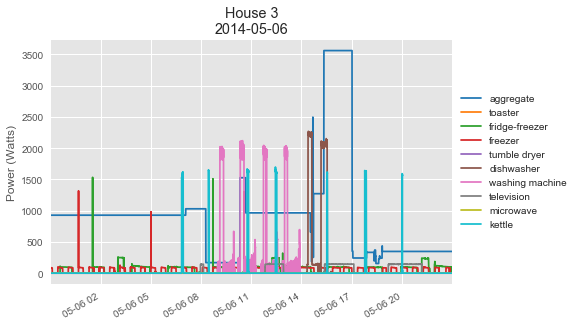

In [16]:
plot_day(3, date_to_datetime(datetime(2014,5,6)))

number of obs: 108
0


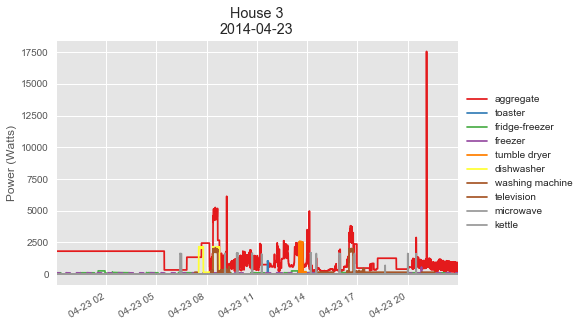

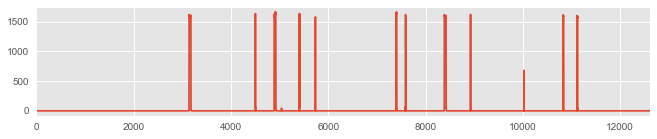

0


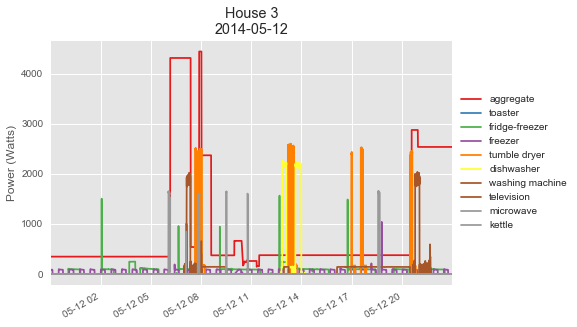

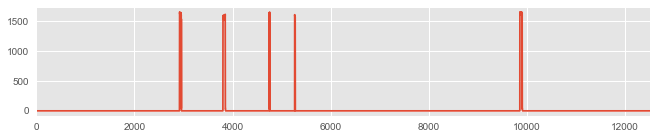

0


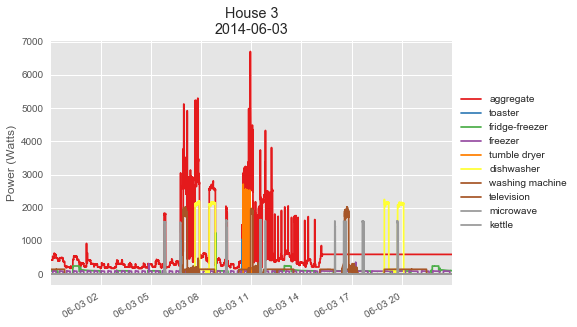

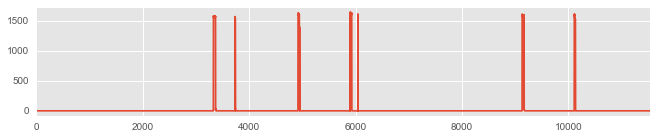

0


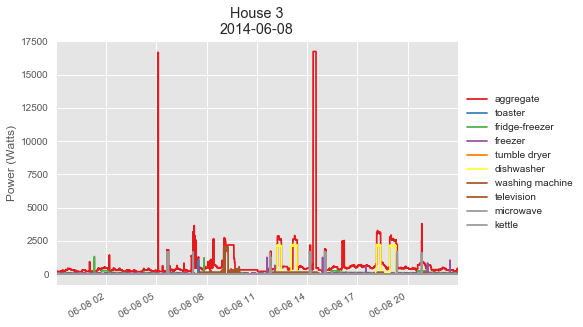

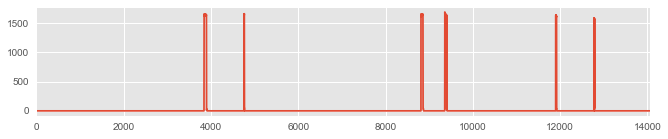

0


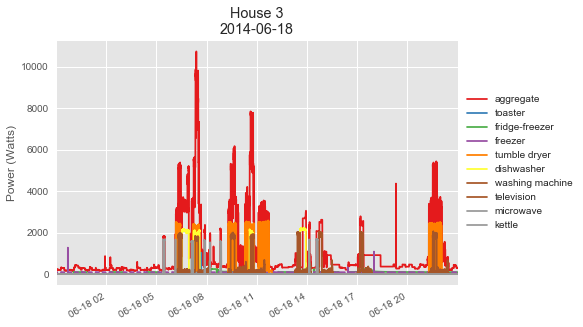

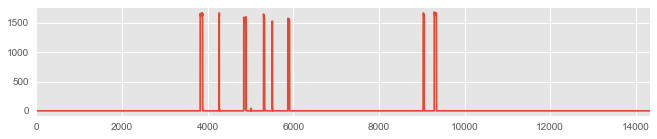

In [717]:
# # fridge
# app_idx = 0
# bad_idx = np.where(Y2[:,app_idx] == 1)[0]
# # bad_idx = np.where(Y2[:,app_idx] == 12)[0]

# # dishwasher
# app_idx = 3
# bad_idx = np.where((Y1[:,app_idx] > 30) & (Y2[:,app_idx] < 1))[0]

# kettle
app_idx = 1
bad_idx = np.where((Y1[:,app_idx] > 0.5) & (Y2[:,app_idx] == 0))[0]

# # washing machine
# app_idx = 2
# bad_idx = np.where((Y1[:,app_idx] > 5) & (Y2[:,app_idx] < 3))[0]

print 'number of obs: {}'.format(len(bad_idx))
app_name = APP_NAMES[app_idx]
    
# plot_series(X[(x_house == house_id) & (x_date == d)][0])

app_params_house_3 = make_app_params_dict()

for idx in bad_idx[:5]:
    
    house_id = x_house[idx]
    d = x_date[idx]
    
    app_nums = get_app_nums(house_id, app_name)
    if len(app_nums) > 1:
        print 'WARNING: more than two of this app in this home'
    
    ts_series = load_ts(house_id)
    ts_mask = get_ts_mask(ts_series, date_to_datetime(d))
    app_power = load_app(house_id, app_nums[0])[ts_mask]
    
    print get_num_activations(app_power, ts_series[ts_mask], app_params[app_name])
    
    plot_day(house_id, date_to_datetime(d))
    plt.show()
    plot_series(app_power)
    plt.show()

In [218]:
house_id = 13
dt = datetime(2014,4,7)
_, ts_mask = get_aligned_ts_mask_for_day(load_ts(13), dt, 6)
np.mean(load_issues(13)[ts_mask])

0.24904153354632588

In [721]:
# plt.close()
# for x, house_id, d in zip(X, x_house, x_date):
#     plot_series(x)
#     plot_day(house_id=house_id, dt=date_to_datetime(d))
#     plt.show()

number of rows: 1462
delete: 1


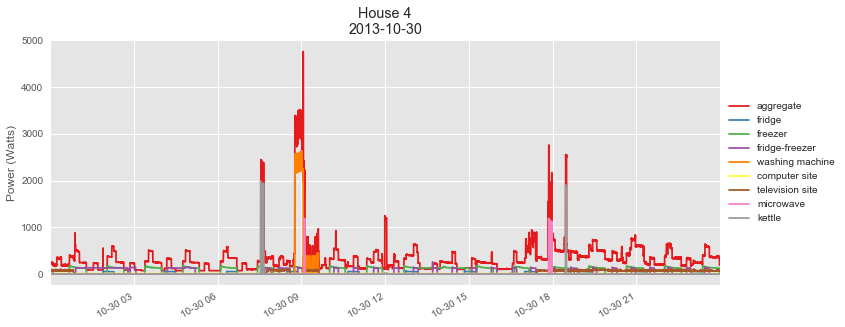

delete: 0


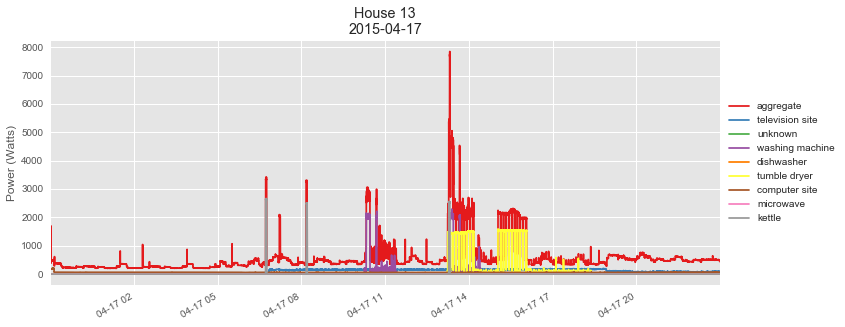

delete: 0


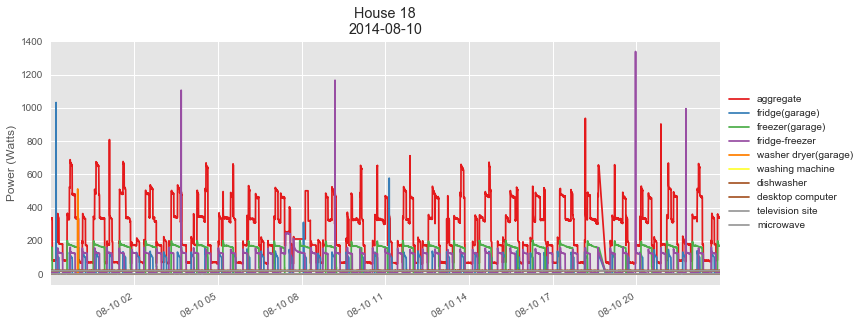

delete: 1


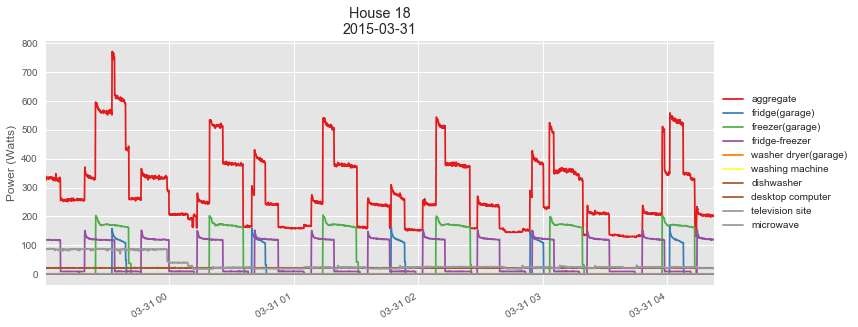

delete: 0


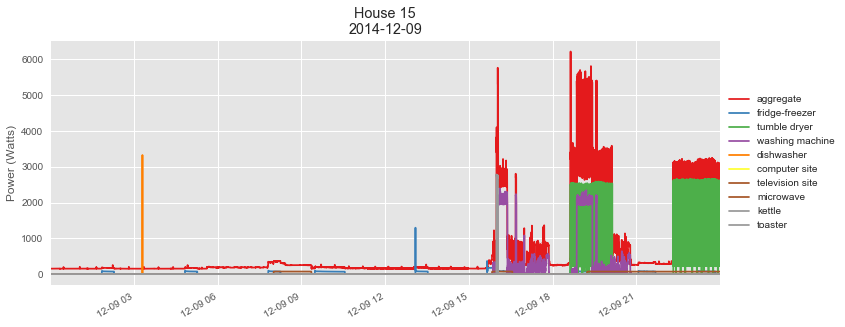

delete: 1


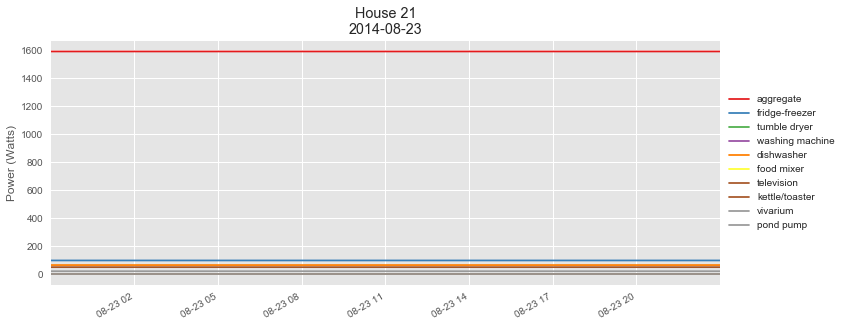

delete: 0


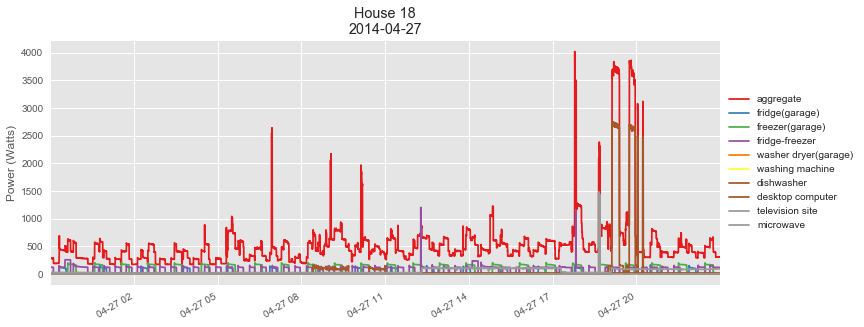

delete: 0


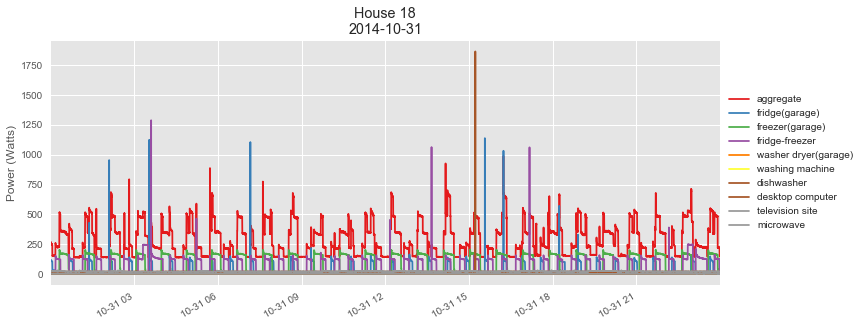

delete: 0


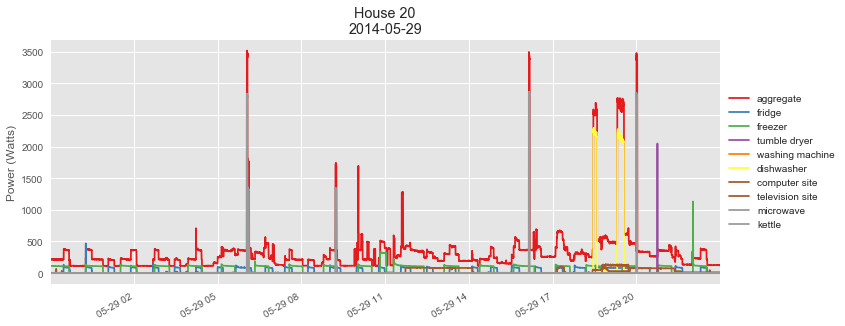

delete: 0


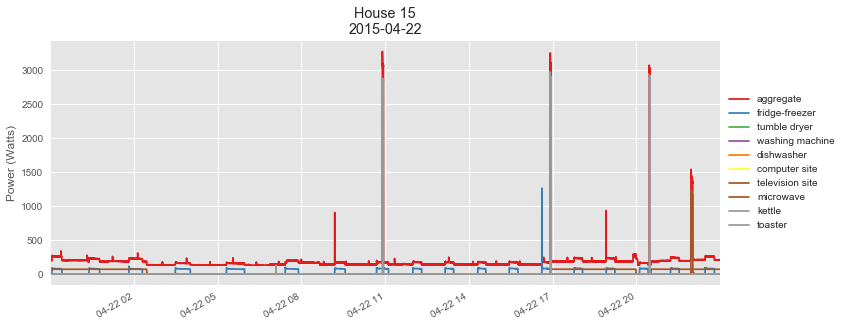

delete: 1


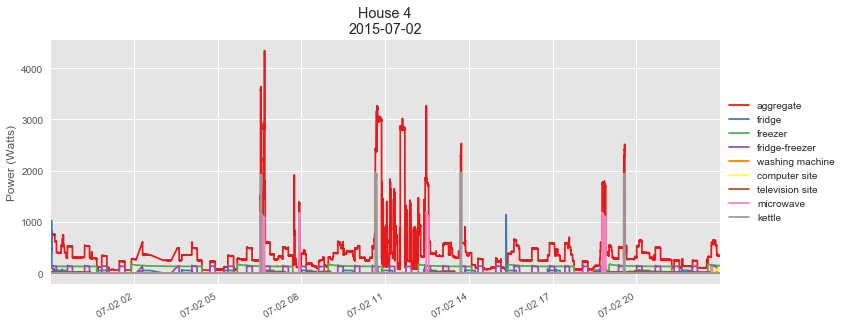

delete: 0


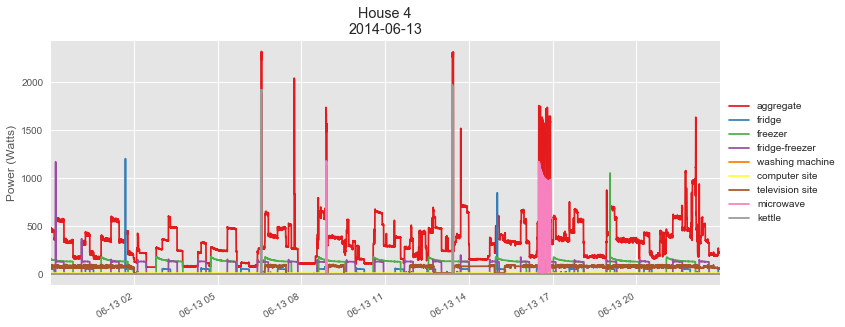

delete: 1


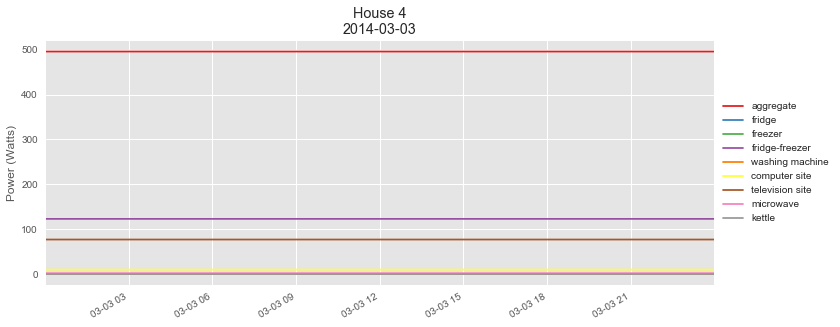

delete: 0


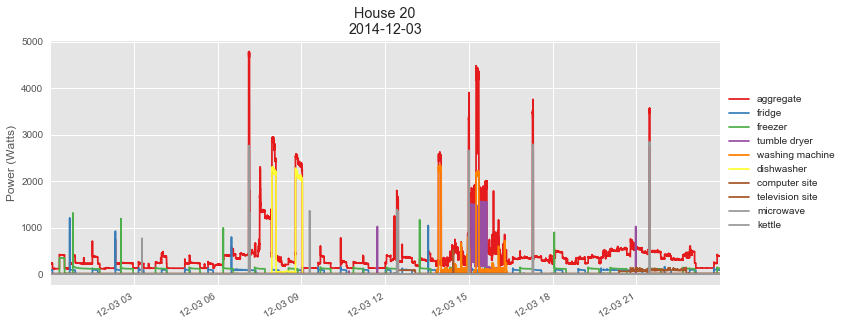

delete: 0


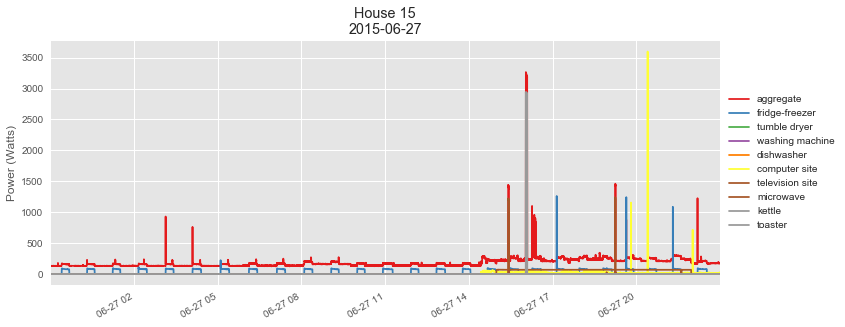

delete: 1


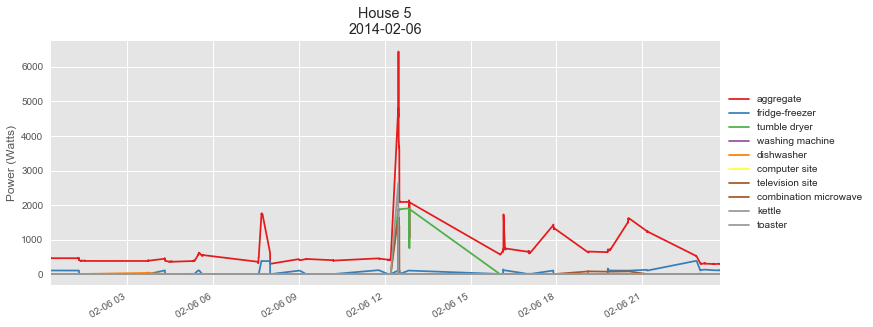

delete: 1


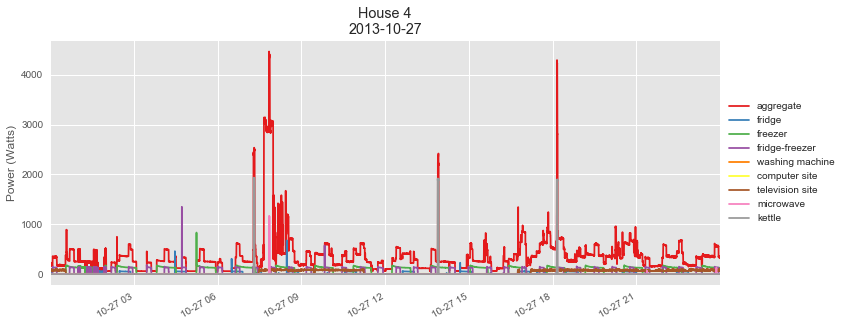

delete: 1


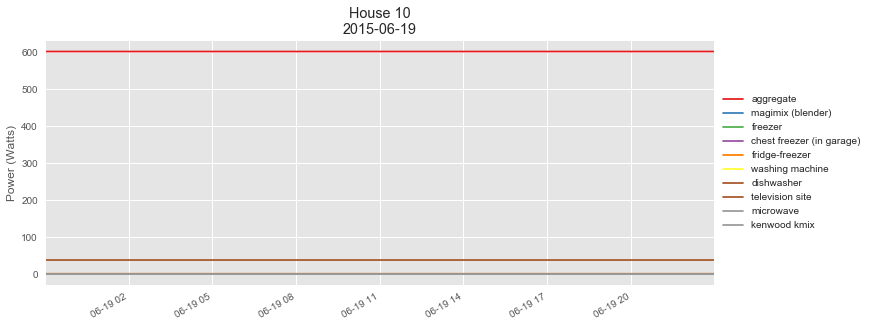

delete: 0


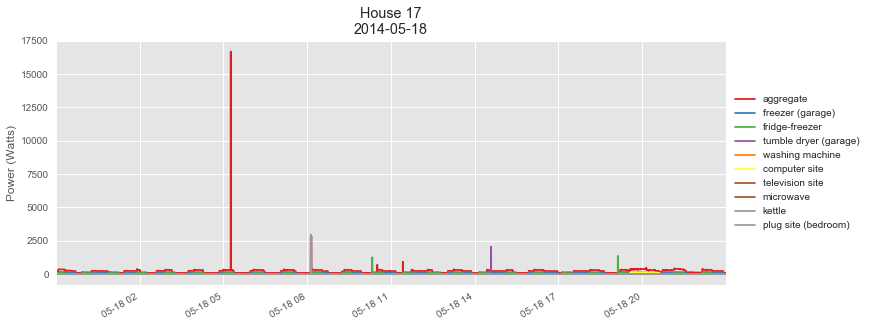

delete: 0


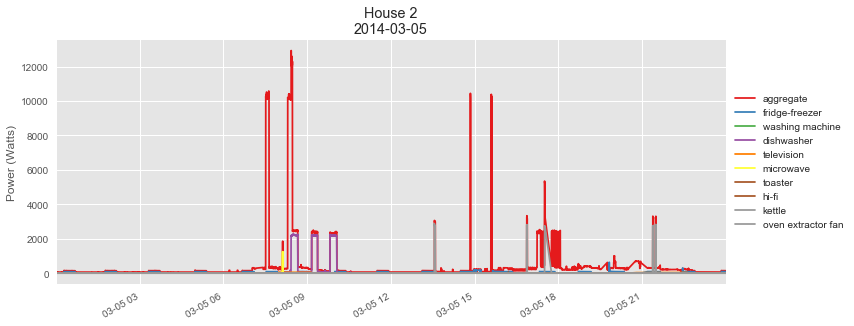

In [20]:
def plot_days_with_conditions(dstats, dstats_cond, max_to_plot=10):
    
    dstats_sub = dstats.loc[dstats_cond]
    print 'number of rows: {}'.format(dstats_sub.shape[0])

    num_to_plot = min(max_to_plot, dstats_sub.shape[0])
    sample = dstats_sub.sample(num_to_plot)

    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    
    for dt, house_id in zip(dt_series, house_ids):
        delete = dstats.loc[(dstats['House']==house_id) & (dstats.index==dt)]['Delete'].values[0]
        print 'delete: {}'.format(delete)
        plot_day(dt=dt, house_id=house_id, figsize=(15,5))
        plt.show()
        
# plot_days_with_conditions(   
#     dstats,
#     dstats[('Appliance2', 'prop_unchanging_large_value')] > 0.1,
#     max_to_plot=10
# )

plot_days_with_conditions(   
    dstats,
    dstats[('SumToMainCorr')] > 0.1,
    max_to_plot=20
)

# plot_days_with_conditions(   
#     dstats,
#     dstats[('Issues', 'mean')] > 0.1,
#     max_to_plot=10
# )

In [751]:
# Check output from debug run of creation of synthetic data.

house_id = 4
app_num = 3
dt = datetime(2015,7,4)

app_name = get_app_name(house_id, app_num)
if app_name == 'fridge-freezer':
    app_name = 'fridge'
ts_series = load_ts(house_id)
aligned_idx, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt, 6)
app_power = load_app(house_id, app_num)

if is_a_target_app(house_id, app_num):
    energy = get_energy(dstats, house_id, dt.date(), [app_num])
    activations = get_num_activations(app_power[ts_mask],
                                      ts_series[ts_mask],
                                      app_params[app_name])
else:
    energy = None
    activations = None
    
    
print 'app_name: {}'.format(app_name)
print 'app_power: {}'.format(app_power[ts_mask][:5])
print 'energy: {}'.format(energy)
print 'activations: {}'.format(activations)

app_name: fridge
app_power: [131 132 132 131 132]
energy: 0.946033611111
activations: 39
